In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#Feature Engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# EDA and Data Preparation

Advanced Reports Visualization

In [114]:

# print(df.info())
# print(df.describe())
# print(df.shape)
# print(df.isnull().sum())
# print(df.duplicated().sum())
# #df[''].value_counts()
# print(df.nunique())


#ADVANCED REPORTS VISUALIZATION!!!!!!!!!!!!
from ydata_profiling import ProfileReport
import webbrowser
import os
df= pd.read_csv('ObData.csv')
profile = ProfileReport(df, title="Profiling Report")
profile

#Save the report as an HTML file
profile.to_file("profile_report.html")

#Open the report in the default web browser
webbrowser.open('file://' + os.path.abspath("profile_report.html"))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 17/17 [00:00<00:00, 41.41it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

False

Data Preparation

In [115]:
df= pd.read_csv('ObData.csv')
pd.set_option('display.max_columns', None)
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [116]:
#Renaming the target column for clarity
df = df.rename(columns={"NObeyesdad": "Obesity_Class"})
df = df.rename(columns={"family_history_with_overweight": "Family_History"})
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,Family_History,FAF,TUE,CAEC,MTRANS,Obesity_Class
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [117]:
# !pip install ydata-profiling # used to download the module of ydata as it wasnt preinsalled on colab


**Phase 1  Visualization**


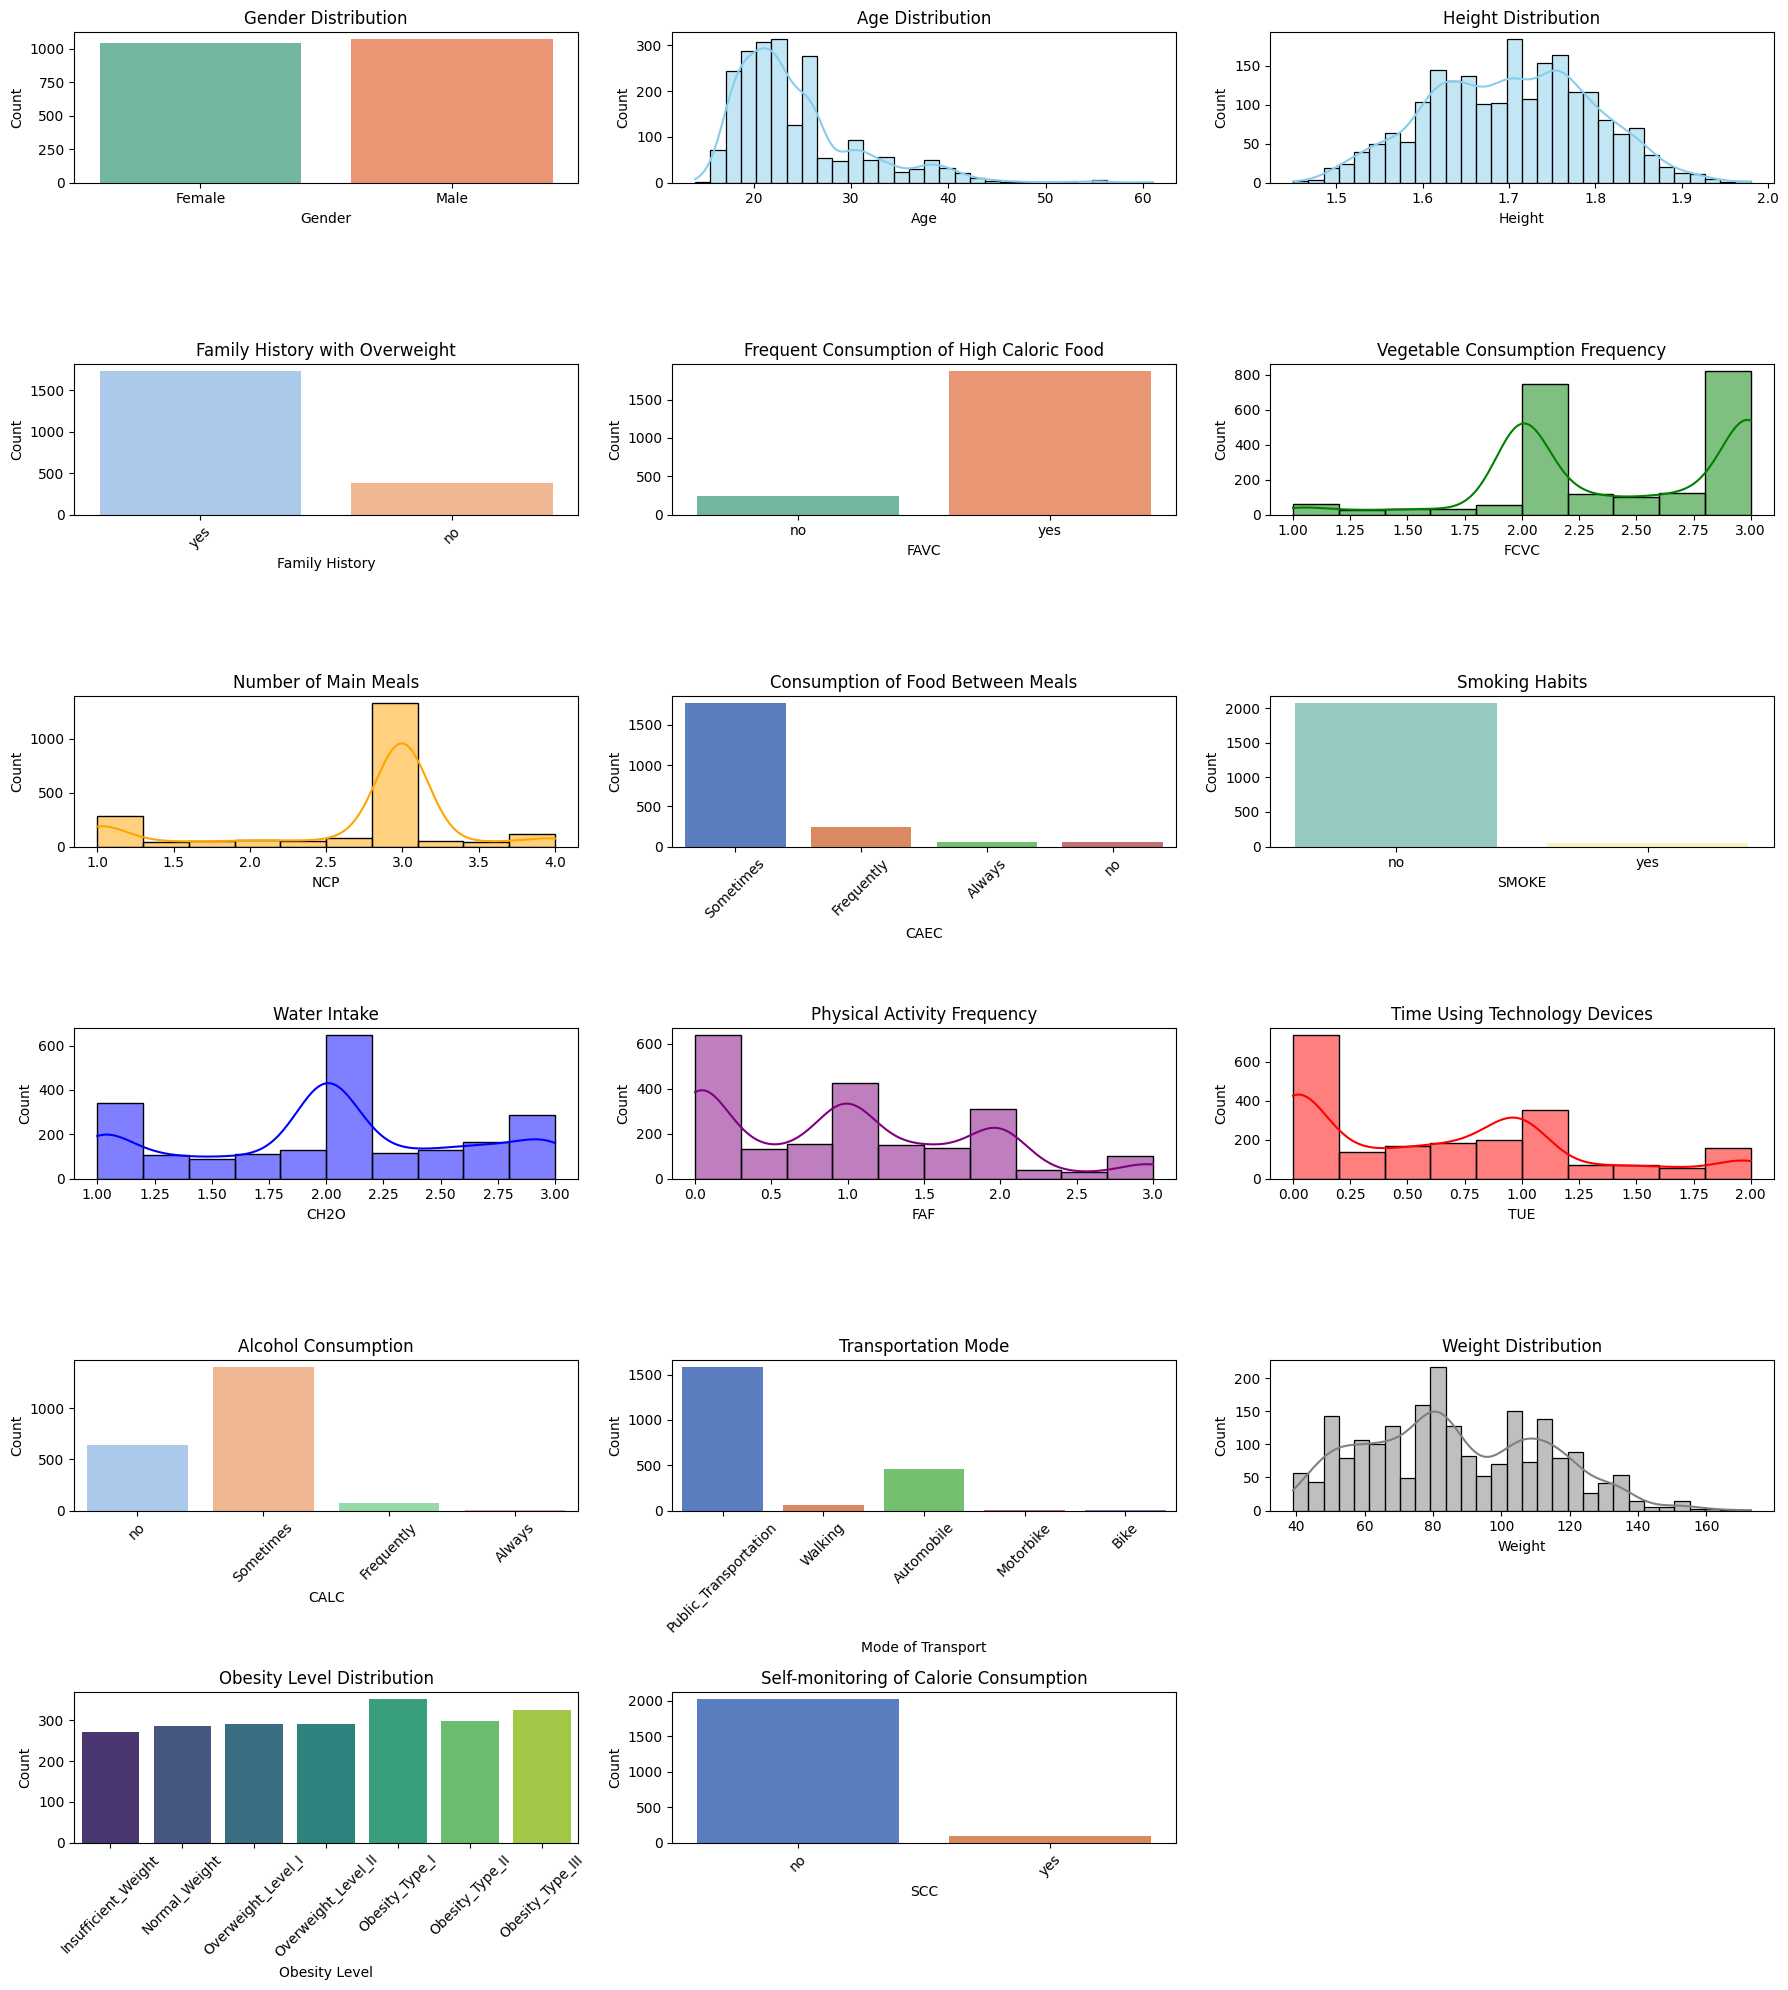

In [118]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(6, 3, figsize=(18, 20))
axes = axes.ravel()  # Flatten the axes array for easier indexing

# 1. Gender Distribution
sns.countplot(x='Gender', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# 2. Age Histogram
sns.histplot(df['Age'], kde=True, bins=30, ax=axes[1], color="skyblue")
axes[1].set_title("Age Distribution")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Count")

# 3. Height Histogram
sns.histplot(df['Height'], kde=True, bins=30, ax=axes[2], color="skyblue")
axes[2].set_title("Height Distribution")
axes[2].set_xlabel("Height")
axes[2].set_ylabel("Count")

# 4. Family History with Overweight
sns.countplot(x='Family_History', data=df, palette='pastel', ax=axes[3])
axes[3].set_title('Family History with Overweight')
axes[3].set_xlabel('Family History')
axes[3].set_ylabel('Count')
axes[3].tick_params(axis='x', rotation=45)

# 5. Frequent Consumption of High Caloric Food (FAVC)
sns.countplot(x='FAVC', data=df, palette='Set2', ax=axes[4])
axes[4].set_title('Frequent Consumption of High Caloric Food')
axes[4].set_xlabel('FAVC')
axes[4].set_ylabel('Count')

# 6. Vegetable Consumption (FCVC)
sns.histplot(df['FCVC'], kde=True, bins=10, ax=axes[5], color="green")
axes[5].set_title("Vegetable Consumption Frequency")
axes[5].set_xlabel("FCVC")
axes[5].set_ylabel("Count")

# 7. Number of Main Meals (NCP)
sns.histplot(df['NCP'], kde=True, bins=10, ax=axes[6], color="orange")
axes[6].set_title("Number of Main Meals")
axes[6].set_xlabel("NCP")
axes[6].set_ylabel("Count")

# 8. Consumption of Food Between Meals (CAEC)
sns.countplot(x='CAEC', data=df, palette='muted', ax=axes[7])
axes[7].set_title('Consumption of Food Between Meals')
axes[7].set_xlabel('CAEC')
axes[7].set_ylabel('Count')
axes[7].tick_params(axis='x', rotation=45)

# 9. Smoking (SMOKE)
sns.countplot(x='SMOKE', data=df, palette='Set3', ax=axes[8])
axes[8].set_title('Smoking Habits')
axes[8].set_xlabel('SMOKE')
axes[8].set_ylabel('Count')

# 10. Water Intake (CH20)
sns.histplot(df['CH2O'], kde=True, bins=10, ax=axes[9], color="blue")
axes[9].set_title("Water Intake")
axes[9].set_xlabel("CH2O")
axes[9].set_ylabel("Count")

# 11. Physical Activity Frequency (FAF)
sns.histplot(df['FAF'], kde=True, bins=10, ax=axes[10], color="purple")
axes[10].set_title("Physical Activity Frequency")
axes[10].set_xlabel("FAF")
axes[10].set_ylabel("Count")

# 12. Time Using Technology Devices (TUE)
sns.histplot(df['TUE'], kde=True, bins=10, ax=axes[11], color="red")
axes[11].set_title("Time Using Technology Devices")
axes[11].set_xlabel("TUE")
axes[11].set_ylabel("Count")

# 13. Alcohol Consumption (CALC)
sns.countplot(x='CALC', data=df, palette='pastel', ax=axes[12])
axes[12].set_title('Alcohol Consumption')
axes[12].set_xlabel('CALC')
axes[12].set_ylabel('Count')
axes[12].tick_params(axis='x', rotation=45)

# 14. Transportation Mode (MTRANS)
sns.countplot(x='MTRANS', data=df, palette='muted', ax=axes[13])
axes[13].set_title('Transportation Mode')
axes[13].set_xlabel('Mode of Transport')
axes[13].set_ylabel('Count')
axes[13].tick_params(axis='x', rotation=45)

# 14. Weight
sns.histplot(df['Weight'], kde=True, bins=30, ax=axes[14], color="grey")
axes[14].set_title('Weight Distribution')
axes[14].set_xlabel('Weight')
axes[14].set_ylabel('Count')


# 15. Target: Obesity Level
order = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I",
         "Overweight_Level_II","Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]
sns.countplot(x='Obesity_Class', data=df, order=order, palette='viridis', ax=axes[15])
axes[15].set_title('Obesity Level Distribution')
axes[15].set_xlabel('Obesity Level')
axes[15].set_ylabel('Count')
axes[15].tick_params(axis='x', rotation=45)

# 16. SCC
sns.countplot(x='SCC', data=df, palette='muted', ax=axes[16])
axes[16].set_title('Self-monitoring of Calorie Consumption')
axes[16].set_xlabel('SCC')
axes[16].set_ylabel('Count')
axes[16].tick_params(axis='x', rotation=45)

fig.delaxes(axes[17])

plt.tight_layout()
plt.show()

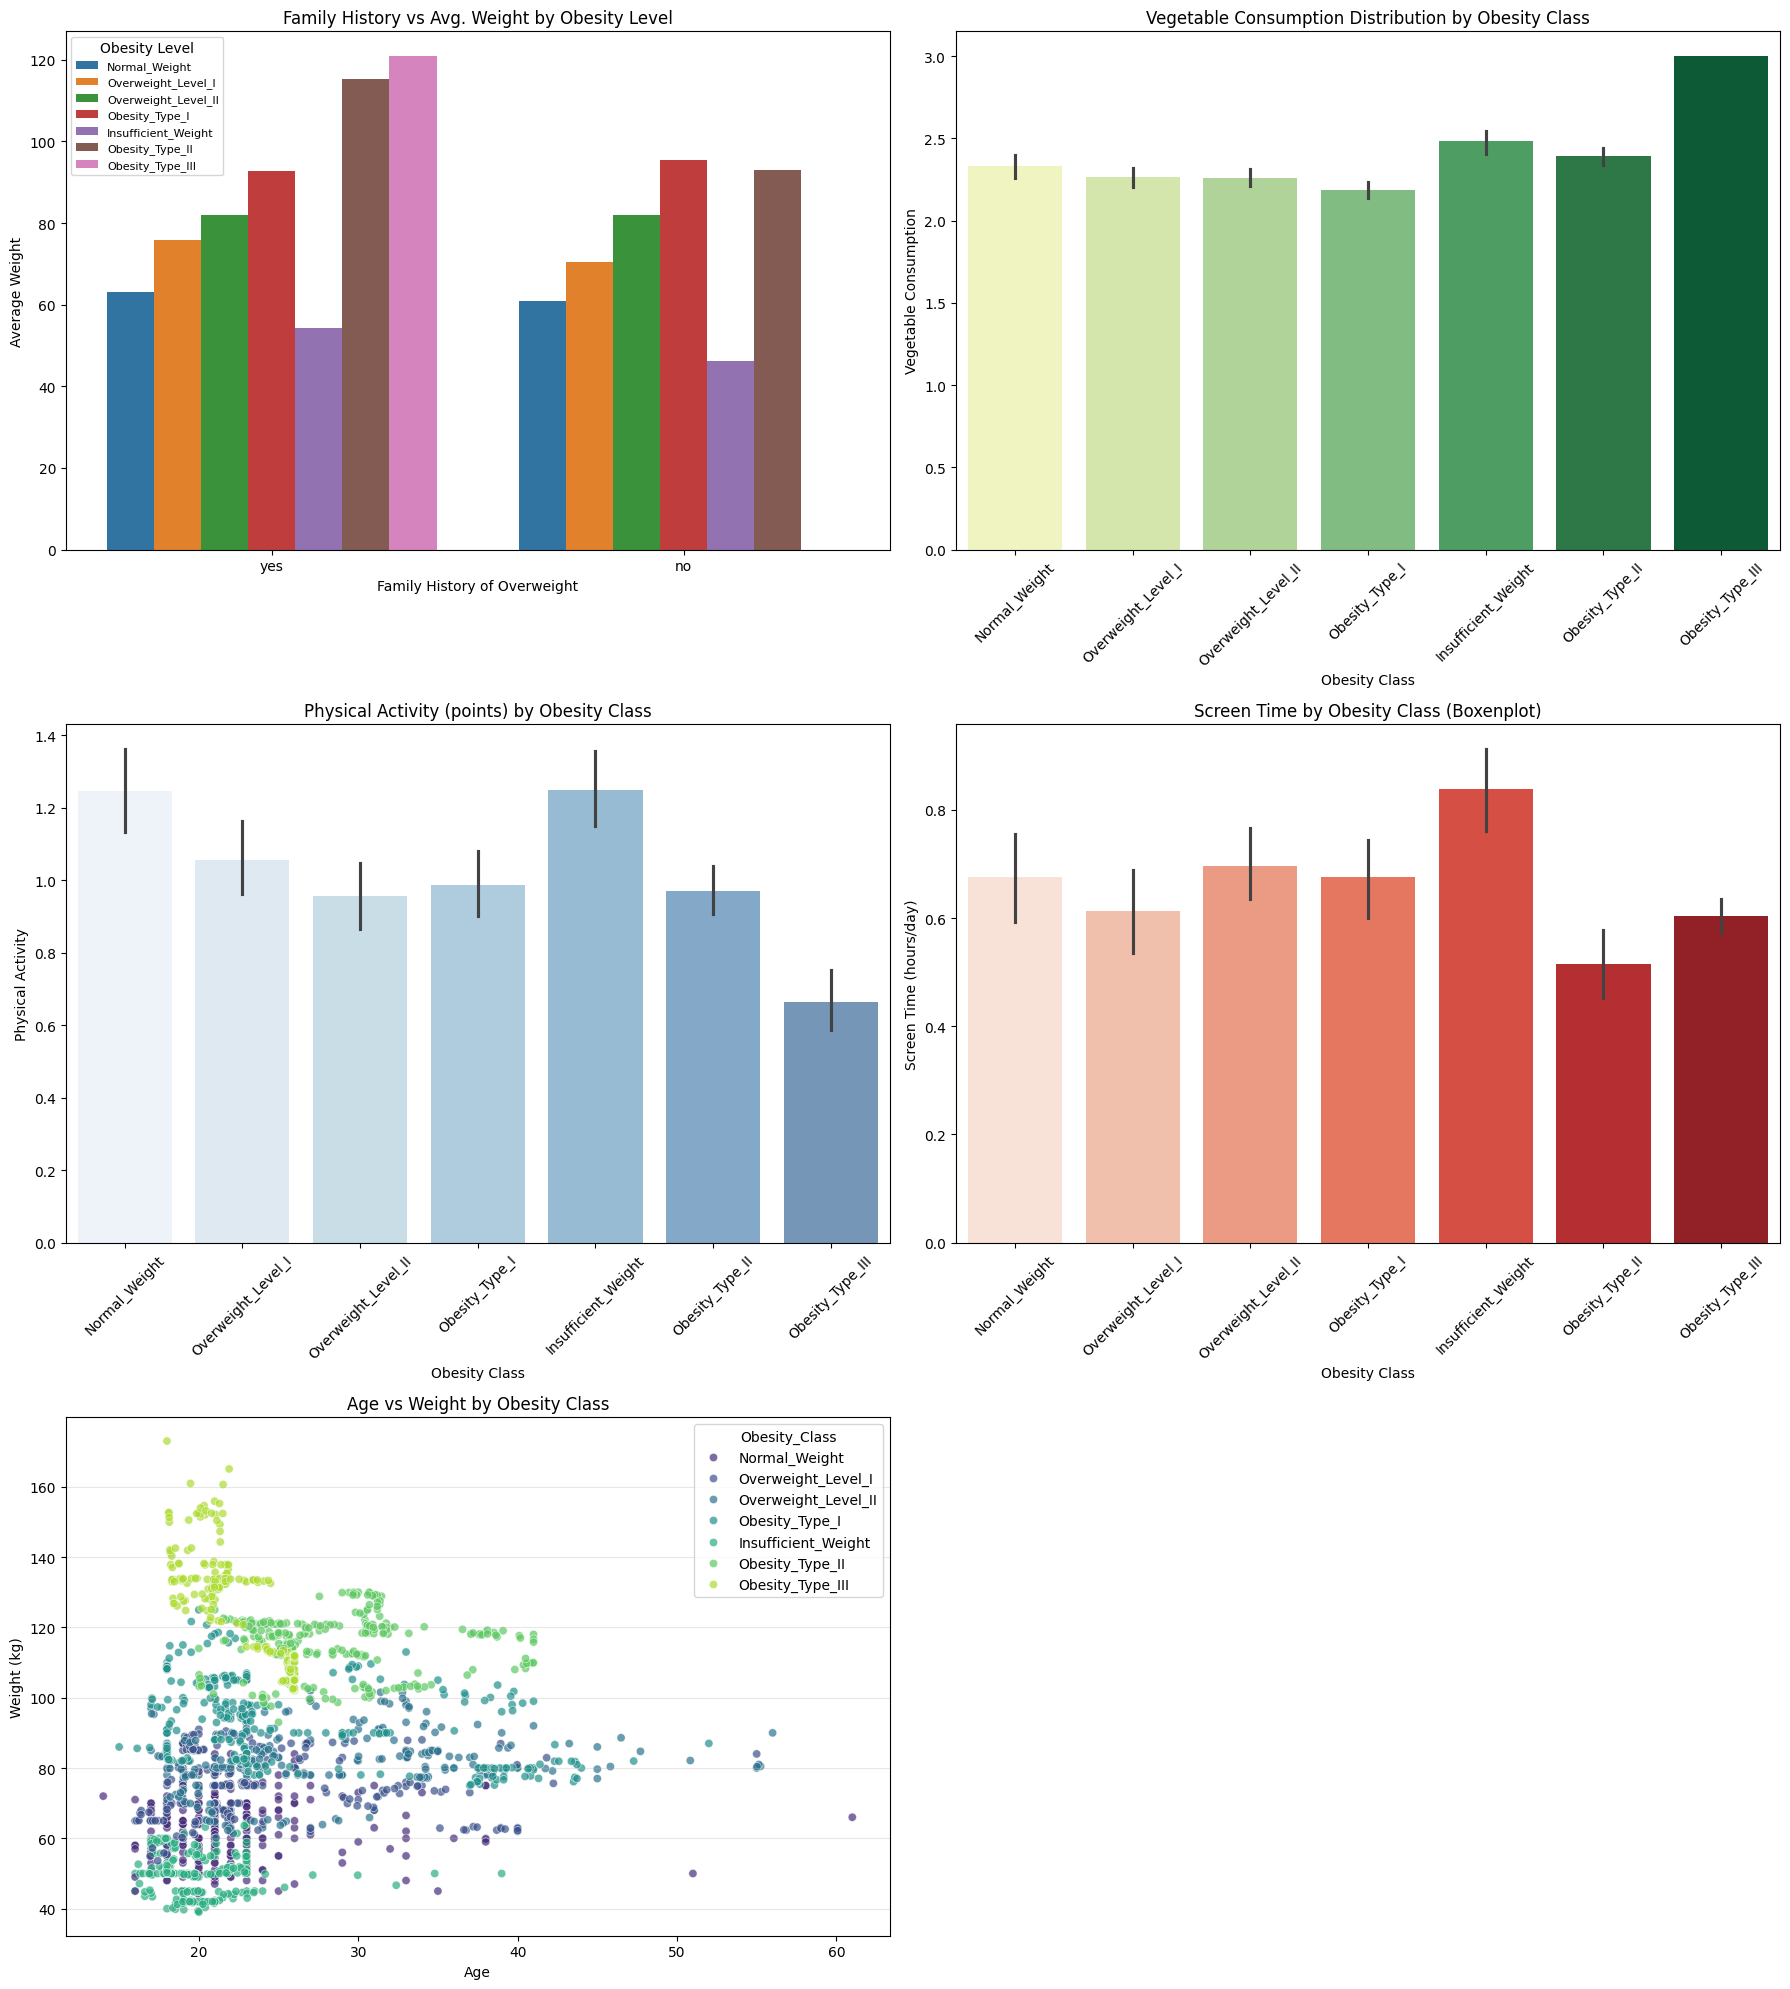

In [119]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 20))
axes = axes.ravel()  # Flatten the axes array for easier indexing

# 5. Family History of Overweight vs Obesity Level → Barplot (normalized mean)
sns.barplot(x='Family_History', y='Weight', hue='Obesity_Class', data=df, ax=axes[0], ci=None)
axes[0].set_title('Family History vs Avg. Weight by Obesity Level')
axes[0].set_xlabel('Family History of Overweight')
axes[0].set_ylabel('Average Weight')
axes[0].legend(title='Obesity Level', fontsize=8)

# 6. Vegetable Consumption vs Obesity Level → Violinplot
sns.barplot(x='Obesity_Class', y='FCVC', data=df, palette='YlGn', ax=axes[1])
axes[1].set_title('Vegetable Consumption Distribution by Obesity Class')
axes[1].set_xlabel('Obesity Class')
axes[1].set_ylabel('Vegetable Consumption')
axes[1].tick_params(axis='x', rotation=45)

# 7. Physical Activity vs Obesity Level → Stripplot (scatter-like)
sns.barplot(x='Obesity_Class', y='FAF', data=df, palette='Blues', ax=axes[2], alpha=0.6)
axes[2].set_title('Physical Activity (points) by Obesity Class')
axes[2].set_xlabel('Obesity Class')
axes[2].set_ylabel('Physical Activity')
axes[2].tick_params(axis='x', rotation=45)

# 8. Screen Time vs Obesity Level → Boxenplot (alternative to boxplot, shows distribution better)
sns.barplot(x='Obesity_Class', y='TUE', data=df, palette='Reds', ax=axes[3])
axes[3].set_title('Screen Time by Obesity Class (Boxenplot)')
axes[3].set_xlabel('Obesity Class')
axes[3].set_ylabel('Screen Time (hours/day)')
axes[3].tick_params(axis='x', rotation=45)

# 9. Weight vs Obesity Level → Scatterplot (Weight vs Age, colored by class)
sns.scatterplot(x='Age', y='Weight', hue='Obesity_Class', data=df, palette='viridis', ax=axes[4], alpha=0.7)
axes[4].set_title('Age vs Weight by Obesity Class')
axes[4].set_xlabel('Age')
axes[4].set_ylabel('Weight (kg)')
axes[4].grid(axis='y', alpha=0.3)

# remove the last empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

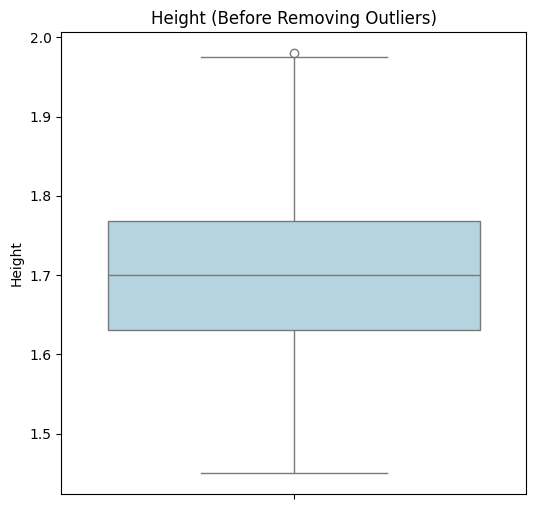

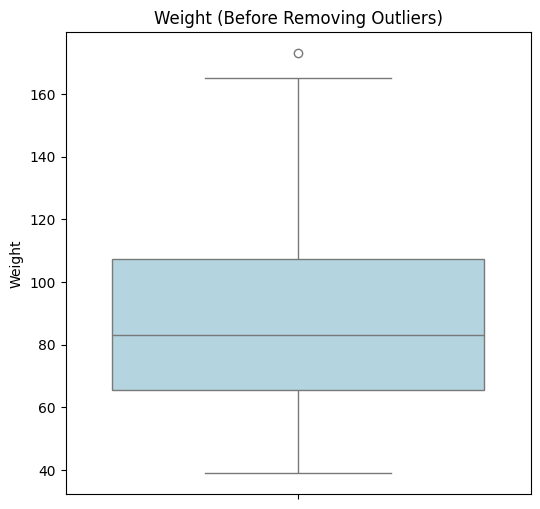

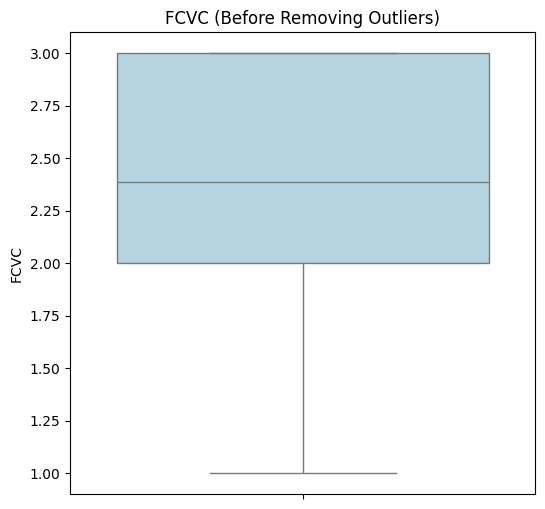

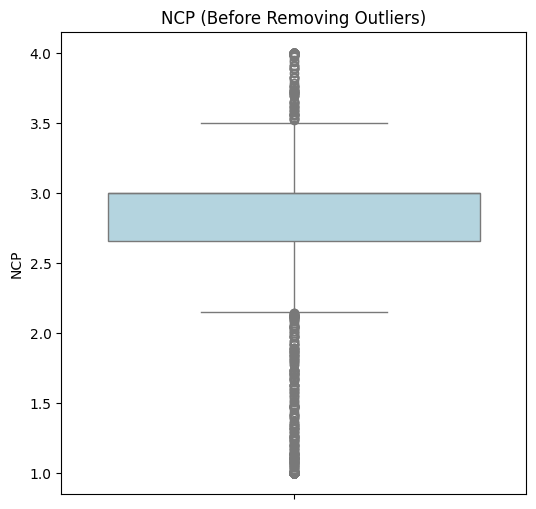

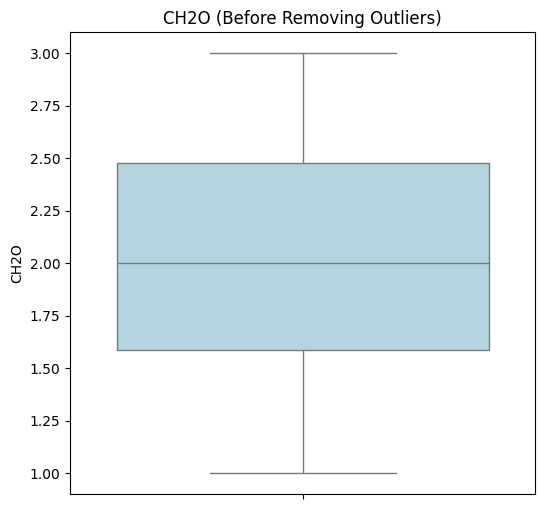

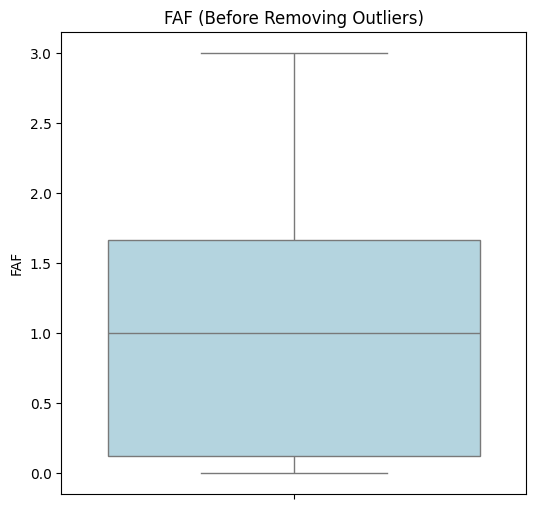

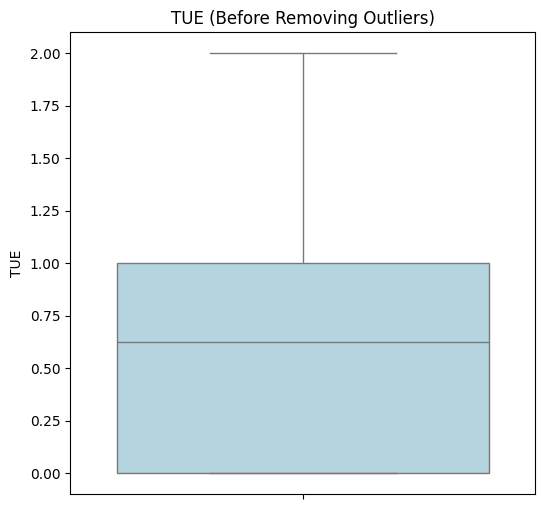

In [120]:
cols = ["Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]

for col in cols:
    plt.figure(figsize=(6,6))
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(f"{col} (Before Removing Outliers)")
    plt.ylabel(col)
    plt.show()

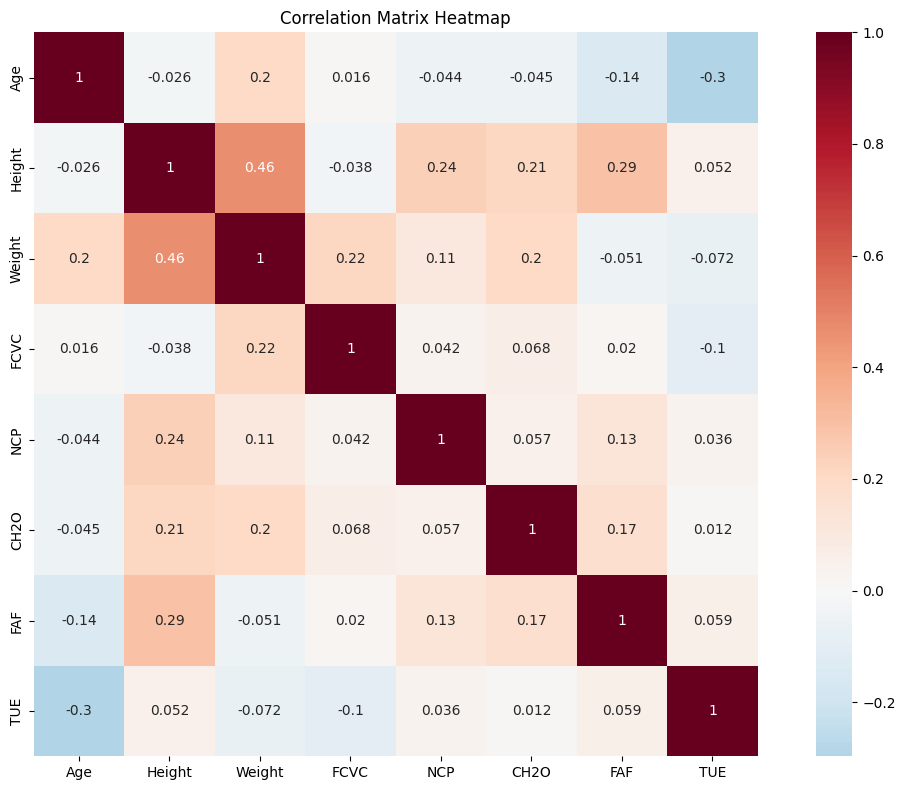

In [121]:
#Correlation Matrix
#
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix,
            annot=True,   # Write the correlation value in each cell
            cmap='RdBu_r', # Use a red-blue colormap
            center=0,     # Center the colormap at 0
            square=True)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# Data Cleaning:

In [122]:
#Checking for Duplicates

df=df.drop_duplicates()
df.duplicated().sum()


np.int64(0)

In [123]:
#Checking for Unique Values(to avoid having same classes but with different spellings)

columns = ['Gender', 'FAVC', 'SCC', 'SMOKE', 'CALC', 'Family_History', 'CAEC', 'MTRANS']

for col in columns:
    unique_values = df[col].unique().tolist()
    print(f"Unique values in {col}: {unique_values}")

Unique values in Gender: ['Female', 'Male']
Unique values in FAVC: ['no', 'yes']
Unique values in SCC: ['no', 'yes']
Unique values in SMOKE: ['no', 'yes']
Unique values in CALC: ['no', 'Sometimes', 'Frequently', 'Always']
Unique values in Family_History: ['yes', 'no']
Unique values in CAEC: ['Sometimes', 'Frequently', 'Always', 'no']
Unique values in MTRANS: ['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike']


# Feature Engineering:

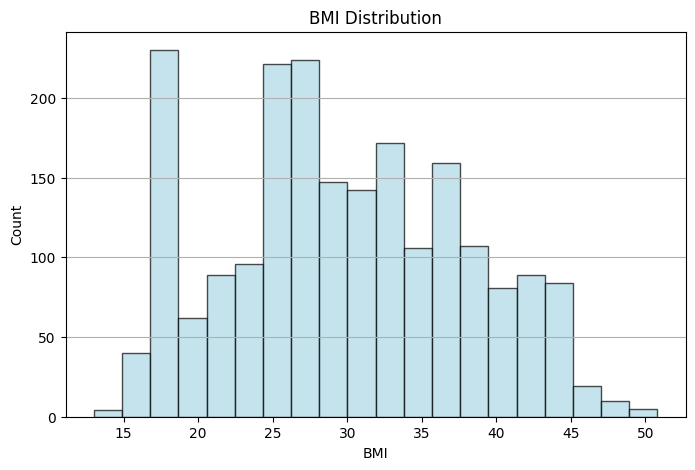

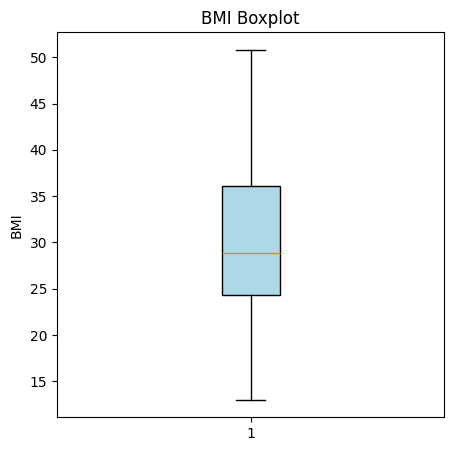

,Age,Gender,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,Family_History,FAF,TUE,CAEC,MTRANS,Obesity_Class,BMI
0,21.000000,Female,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight,24.386526
1,21.000000,Female,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,23.000000,Male,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight,23.765432
3,27.000000,Male,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I,26.851852
4,22.000000,Male,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,44.901475
2107,21.982942,Female,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,43.741923
2108,22.524036,Female,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,43.543817
2109,24.361936,Female,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,44.071535


In [124]:
# Removing Weight, Height cols

# Calculate BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Histogram of BMI
plt.figure(figsize=(8,5))
plt.hist(df['BMI'], bins=20, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# Optional: Boxplot of BMI
plt.figure(figsize=(5,5))
plt.boxplot(df['BMI'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('BMI Boxplot')
plt.ylabel('BMI')
plt.show()

df.drop(columns=["Weight","Height"], inplace=True)
df

In [125]:
#Detecting Imbalance in Categorical Features
categorical_columns=['Gender', 'FAVC', 'SCC', 'SMOKE', 'Family_History','MTRANS']

def check_categorical_imbalance(df, categorical_columns):
    for col in categorical_columns:
        print(f"\n--- {col} ---")
        value_counts = df[col].value_counts()
        proportions = df[col].value_counts(normalize=True)

        # Display value counts and proportions
        for value, count in value_counts.items():
            prop = proportions[value]
            print(f"{value}: {count} ({prop:.2%})")

        # Check if any category has very low representation
        if proportions.min() < 0.05:  # Less than 5%
            print(f"⚠️  WARNING: {col} has imbalanced categories")

        print("-" * 30)

# List of categorical columns
categorical_cols = ['Gender', 'FAVC', 'SCC', 'SMOKE', 'Family_History','MTRANS']

check_categorical_imbalance(df, categorical_cols)


--- Gender ---
Male: 1052 (50.41%)
Female: 1035 (49.59%)
------------------------------

--- FAVC ---
yes: 1844 (88.36%)
no: 243 (11.64%)
------------------------------

--- SCC ---
no: 1991 (95.40%)
yes: 96 (4.60%)
⚠️  WARNING: SCC has imbalanced categories
------------------------------

--- SMOKE ---
no: 2043 (97.89%)
yes: 44 (2.11%)
⚠️  WARNING: SMOKE has imbalanced categories
------------------------------

--- Family_History ---
yes: 1722 (82.51%)
no: 365 (17.49%)
------------------------------

--- MTRANS ---
Public_Transportation: 1558 (74.65%)
Automobile: 456 (21.85%)
Walking: 55 (2.64%)
Motorbike: 11 (0.53%)
Bike: 7 (0.34%)
⚠️  WARNING: MTRANS has imbalanced categories
------------------------------


In [126]:
#Imbalance Correction:

#SMOKE Correction:
df.drop(columns=['SMOKE'],inplace=True)

#SCC Correction:
df.drop(columns=['SCC'],inplace=True)

# #Transportation Mode Correction:
df['MTRANS'] = df['MTRANS'].replace(['Automobile', 'Motorbike', 'Bike'], 'Other')
df.head(7)

,Age,Gender,CALC,FAVC,FCVC,NCP,CH2O,Family_History,FAF,TUE,CAEC,MTRANS,Obesity_Class,BMI
0,21.0,Female,no,no,2.0,3.0,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight,24.386526
1,21.0,Female,Sometimes,no,3.0,3.0,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,23.0,Male,Frequently,no,2.0,3.0,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight,23.765432
3,27.0,Male,Frequently,no,3.0,3.0,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I,26.851852
4,22.0,Male,Sometimes,no,2.0,1.0,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381
5,29.0,Male,Sometimes,yes,2.0,3.0,2.0,no,0.0,0.0,Sometimes,Other,Normal_Weight,20.195092
6,23.0,Female,Sometimes,yes,3.0,3.0,2.0,yes,1.0,0.0,Sometimes,Other,Normal_Weight,24.444444


In [127]:
#Detecting Numerical Imbalance:

numerical_columns=['Age','FCVC','NCP','CH2O','FAF','TUE','BMI']

def check_numerical_imbalance(df, numerical_columns):
    for col in numerical_columns:
        print(f"\n--- {col} ---")
        print(f"Mean: {df[col].mean():.2f}")
        print(f"Median: {df[col].median():.2f}")
        print(f"Std: {df[col].std():.2f}")
        print(f"Skewness: {df[col].skew():.2f}")

        # Check for skewness (absolute value > 1 indicates significant skew)
        if abs(df[col].skew()) > 1:
            print(f"⚠️  WARNING: {col} is highly skewed")

        # Check outliers using IQR method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_percentage = len(outliers) / len(df) * 100

        print(f"Outliers: {len(outliers)} ({outlier_percentage:.2f}%)")

        if outlier_percentage > 5:
            print(f"⚠️  WARNING: {col} has many outliers")

        print("-" * 30)

# List of numerical columns
numerical_cols = ['Age', 'BMI', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

check_numerical_imbalance(df, numerical_cols)


--- Age ---
Mean: 24.35
Median: 22.85
Std: 6.37
Skewness: 1.51
⚠️  WARNING: Age is highly skewed
Outliers: 167 (8.00%)
⚠️  WARNING: Age has many outliers
------------------------------

--- BMI ---
Mean: 29.77
Median: 28.90
Std: 8.02
Skewness: 0.14
Outliers: 0 (0.00%)
------------------------------

--- FCVC ---
Mean: 2.42
Median: 2.40
Std: 0.53
Skewness: -0.45
Outliers: 0 (0.00%)
------------------------------

--- NCP ---
Mean: 2.70
Median: 3.00
Std: 0.76
Skewness: -1.14
⚠️  WARNING: NCP is highly skewed
Outliers: 577 (27.65%)
⚠️  WARNING: NCP has many outliers
------------------------------

--- CH2O ---
Mean: 2.00
Median: 2.00
Std: 0.61
Skewness: -0.11
Outliers: 0 (0.00%)
------------------------------

--- FAF ---
Mean: 1.01
Median: 1.00
Std: 0.85
Skewness: 0.49
Outliers: 0 (0.00%)
------------------------------

--- TUE ---
Mean: 0.66
Median: 0.63
Std: 0.61
Skewness: 0.61
Outliers: 0 (0.00%)
------------------------------


In [128]:
#Outliers Removal:

def cap_outliers_iqr(series, factor=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    return series.clip(lower_bound, upper_bound)

df['Age'] = cap_outliers_iqr(df['Age'])
df['NCP'] = cap_outliers_iqr(df['NCP'])


# Check outliers after processing
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return ((series < (Q1 - 1.5 * IQR)) | (series > (Q3 + 1.5 * IQR))).sum()

print("Age outliers after:", count_outliers_iqr(df['Age']))
print("NCP outliers after:", count_outliers_iqr(df['NCP']))


Age outliers after: 0
NCP outliers after: 0


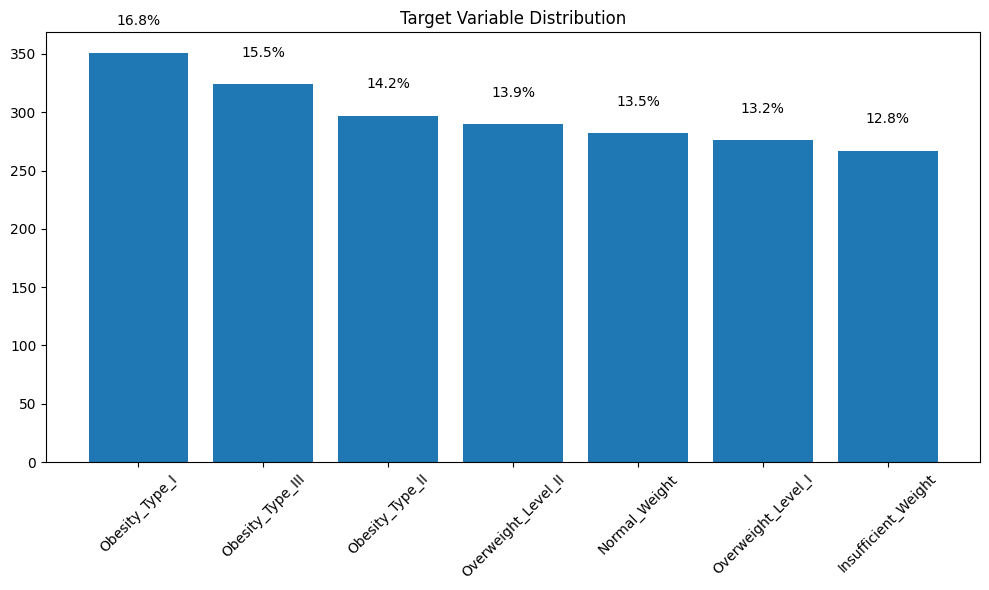

Imbalance ratio: 1.31


In [129]:
# Check target variable imbalance
target_col = 'Obesity_Class'
target_counts = df[target_col].value_counts()
target_proportions = df[target_col].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
bars = plt.bar(target_counts.index, target_counts.values)
plt.title('Target Variable Distribution')
plt.xticks(rotation=45)

# Add percentage labels
total = len(df[target_col])
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01 * total,
             f'{target_proportions[i]:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Calculate imbalance ratio
max_count = target_counts.max()
min_count = target_counts.min()
imbalance_ratio = max_count / min_count

print(f"Imbalance ratio: {imbalance_ratio:.2f}")
if imbalance_ratio > 4:
    print("⚠️  WARNING: Significant class imbalance detected")

In [130]:
#Checking for Categorical Values (to decide on encoding)

columns = ['Gender', 'FAVC', 'CALC', 'Family_History', 'CAEC', 'MTRANS']

for col in columns:
    unique_values = df[col].unique().tolist()
    print(f"Unique values in {col}: {unique_values}")

Unique values in Gender: ['Female', 'Male']
Unique values in FAVC: ['no', 'yes']
Unique values in CALC: ['no', 'Sometimes', 'Frequently', 'Always']
Unique values in Family_History: ['yes', 'no']
Unique values in CAEC: ['Sometimes', 'Frequently', 'Always', 'no']
Unique values in MTRANS: ['Public_Transportation', 'Walking', 'Other']


In [131]:
# #Encoding Features

encoded_df = df.copy()

idx = encoded_df.columns.get_loc('Obesity_Class')
X = encoded_df.drop(encoded_df.columns[idx], axis=1)
y = encoded_df.iloc[:, idx]
print(X)
print(y)

# Label Encoding for Ordinal/Binary Values
columnsLE = ['Gender', 'FAVC', 'Family_History']
for obj in columnsLE:
     le = LabelEncoder()
     encoded_df[obj] = le.fit_transform(encoded_df[obj])

# One-Hot Encoding for Multi-Nominal Values: CALC and CAEC
encoded_df = pd.get_dummies(encoded_df, columns=['CALC', 'CAEC', 'MTRANS'], drop_first=False)

#Display the result


column_to_move = 'Obesity_Class'
encoded_df = encoded_df[[c for c in encoded_df.columns if c != column_to_move] + [column_to_move]]
encoded_df.head()

            Age  Gender        CALC FAVC  FCVC       NCP      CH2O  \
0     21.000000  Female          no   no   2.0  3.000000  2.000000   
1     21.000000  Female   Sometimes   no   3.0  3.000000  3.000000   
2     23.000000    Male  Frequently   no   2.0  3.000000  2.000000   
3     27.000000    Male  Frequently   no   3.0  3.000000  2.000000   
4     22.000000    Male   Sometimes   no   2.0  2.243667  2.000000   
...         ...     ...         ...  ...   ...       ...       ...   
2106  20.976842  Female   Sometimes  yes   3.0  3.000000  1.728139   
2107  21.982942  Female   Sometimes  yes   3.0  3.000000  2.005130   
2108  22.524036  Female   Sometimes  yes   3.0  3.000000  2.054193   
2109  24.361936  Female   Sometimes  yes   3.0  3.000000  2.852339   
2110  23.664709  Female   Sometimes  yes   3.0  3.000000  2.863513   

     Family_History       FAF       TUE       CAEC                 MTRANS  \
0               yes  0.000000  1.000000  Sometimes  Public_Transportation   
1    

,Age,Gender,FAVC,FCVC,NCP,CH2O,Family_History,FAF,TUE,BMI,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Other,MTRANS_Public_Transportation,MTRANS_Walking,Obesity_Class
0,21.0,0,0,2.0,3.000000,2.0,1,0.0,1.0,24.386526,False,False,False,True,False,False,True,False,False,True,False,Normal_Weight
1,21.0,0,0,3.0,3.000000,3.0,1,3.0,0.0,24.238227,False,False,True,False,False,False,True,False,False,True,False,Normal_Weight
2,23.0,1,0,2.0,3.000000,2.0,1,2.0,1.0,23.765432,False,True,False,False,False,False,True,False,False,True,False,Normal_Weight
3,27.0,1,0,3.0,3.000000,2.0,0,2.0,0.0,26.851852,False,True,False,False,False,False,True,False,False,False,True,Overweight_Level_I
4,22.0,1,0,2.0,2.243667,2.0,0,0.0,0.0,28.342381,False,False,True,False,False,False,True,False,False,True,False,Overweight_Level_II


In [132]:
# Feature Selection:

# X is my features, y is my target
X = encoded_df.iloc[:, :-1]  # Select all columns except the last one as features
y = encoded_df['Obesity_Class']  # Select the last column as target variable

# Filter Method: ANOVA F-test (for numerical features vs categorical target)
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k='all')  # Initialize selector to get scores for all features
selector.fit(X, y)  # Fit the selector to calculate feature scores

# Get feature scores and create DataFrame
feature_scores = pd.DataFrame({
    'Feature': X.columns,  # Feature names
    'Score': selector.scores_,  # ANOVA F-test scores (higher = better)
    'P-value': selector.pvalues_  # Statistical significance (lower = better)
}).sort_values('Score', ascending=False)  # Sort by score descending

# Embedded Method: Random Forest feature importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize Random Forest
rf.fit(X, y)  # Train the model on all features

# Get feature importances from trained model
feature_importances = pd.DataFrame({
    'Feature': X.columns,  # Feature names
    'Importance': rf.feature_importances_  # Feature importance scores from Random Forest
}).sort_values('Importance', ascending=False)  # Sort by importance descending

# Combine both approaches for robust feature selection
combined_scores = pd.merge(feature_scores, feature_importances, on='Feature')  # Merge both DataFrames

# Create combined score by normalizing both metrics and averaging them
combined_scores['Combined_Score'] = (combined_scores['Score'] / combined_scores['Score'].max() +
                                    combined_scores['Importance'] / combined_scores['Importance'].max()) / 2

print("Combined Feature Rankings:")
print(combined_scores.sort_values('Combined_Score', ascending=False))  # Show features ranked by combined score

Combined Feature Rankings:
                         Feature        Score        P-value  Importance  \
0                            BMI  9932.601908   0.000000e+00    0.432366   
4                           FCVC   110.454307  3.796507e-121    0.087645   
6                            Age    96.102628  7.841269e-107    0.087625   
1                         Gender   159.433043  6.852093e-167    0.050832   
10                           NCP    37.378364   2.948728e-43    0.045519   
14                           FAF    18.176809   1.155420e-20    0.044519   
19                           TUE     7.934931   1.772380e-08    0.044824   
16                          CH2O    15.187240   4.297247e-17    0.042078   
2                 Family_History   145.743832  1.468826e-154    0.033282   
3                 CAEC_Sometimes   115.703250  2.837371e-126    0.020211   
5                CAEC_Frequently   107.518893  2.960702e-118    0.017171   
7                 CALC_Sometimes    56.806173   3.149443e-65 

In [133]:
# Features to remove
features_to_remove = [
     'CALC_Always',        # Combined_Score: 0.000091
     'MTRANS_Walking',     # Combined_Score: 0.003998
     'CAEC_no',            # Combined_Score: 0.004012
     'CALC_Frequently',    # Combined_Score: 0.004718
     'CAEC_Always'         # Combined_Score: 0.005215
]

# Remove low importance features
X_reduced = X.drop(columns=features_to_remove)

print(f"Original features: {X.shape[1]}")
print(f"After removal: {X_reduced.shape[1]}")
print(f"Removed {len(features_to_remove)} low-importance features")

# encoded_df.drop(columns=features_to_remove,inplace=True)
encoded_df

Original features: 21
After removal: 16
Removed 5 low-importance features


,Age,Gender,FAVC,FCVC,NCP,CH2O,Family_History,FAF,TUE,BMI,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Other,MTRANS_Public_Transportation,MTRANS_Walking,Obesity_Class
0,21.000000,0,0,2.0,3.000000,2.000000,1,0.000000,1.000000,24.386526,False,False,False,True,False,False,True,False,False,True,False,Normal_Weight
1,21.000000,0,0,3.0,3.000000,3.000000,1,3.000000,0.000000,24.238227,False,False,True,False,False,False,True,False,False,True,False,Normal_Weight
2,23.000000,1,0,2.0,3.000000,2.000000,1,2.000000,1.000000,23.765432,False,True,False,False,False,False,True,False,False,True,False,Normal_Weight
3,27.000000,1,0,3.0,3.000000,2.000000,0,2.000000,0.000000,26.851852,False,True,False,False,False,False,True,False,False,False,True,Overweight_Level_I
4,22.000000,1,0,2.0,2.243667,2.000000,0,0.000000,0.000000,28.342381,False,False,True,False,False,False,True,False,False,True,False,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1,3.0,3.000000,1.728139,1,1.676269,0.906247,44.901475,False,False,True,False,False,False,True,False,False,True,False,Obesity_Type_III
2107,21.982942,0,1,3.0,3.000000,2.005130,1,1.341390,0.599270,43.741923,False,False,True,False,False,False,True,False,False,True,False,Obesity_Type_III
2108,22.524036,0,1,3.0,3.000000,2.054193,1,1.414209,0.646288,43.543817,False,False,True,False,False,False,True,False,False,True,False,Obesity_Type_III
2109,24.361936,0,1,3.0,3.000000,2.852339,1,1.139107,0.586035,44.071535,False,False,True,False,False,False,True,False,False,True,False,Obesity_Type_III


In [134]:
#Splitting Data before Scaling
X=encoded_df.iloc[:,:-1]
y=encoded_df['Obesity_Class']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1669, 21)
X_test shape: (418, 21)
y_train shape: (1669,)
y_test shape: (418,)


In [135]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# Only transform X_test (not fit_transform!)   whyy
X_test = scaler.transform(X_test)
##Always fit your scaler on the training data and then apply the same transformation to the test data to avoid data leakage.

In [136]:
#Logistsic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 5) Train Logistic Regression
model = LogisticRegression(max_iter=2000, multi_class="multinomial")
model.fit(X_train, y_train)

# 6) Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
logAcc=accuracy_score(y_test, y_pred)

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.pipeline import Pipeline
# import numpy as np

# # 1) Polynomial Feature Expansion with scaling
# poly = PolynomialFeatures(degree=2, include_bias=False)  # You can adjust the degree

# # Transform training and testing data
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.transform(X_test)

# print(f"Original features: {X_train.shape[1]}")
# print(f"Polynomial features: {X_train_poly.shape[1]}")
# print("Feature names:", poly.get_feature_names_out())

# # 2) Train Logistic Regression with polynomial features
# model = LogisticRegression(max_iter=2000, multi_class="multinomial", random_state=42)
# model.fit(X_train, y_train)

# # 3) Predict and evaluate
# y_pred = model.predict(X_test)

# print("Accuracy with Polynomial Features:", accuracy_score(y_test, y_pred))
# print("\nClassification Report with Polynomial Features:\n", classification_report(y_test, y_pred))
# logAcc_poly = accuracy_score(y_test, y_pred)

# # Compare with original features
# model_original = LogisticRegression(max_iter=2000, multi_class="multinomial", random_state=42)
# model_original.fit(X_train, y_train)
# y_pred_original = model_original.predict(X_test)
# logAcc_original = accuracy_score(y_test, y_pred_original)

# print(f"\nComparison:")
# print(f"Accuracy without polynomial features: {logAcc_original:.4f}")
# print(f"Accuracy with polynomial features: {logAcc_poly:.4f}")
# print(f"Improvement: {(logAcc_poly - logAcc_original):.4f}")

Accuracy: 0.868421052631579

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.89      0.93      0.91        59
      Normal_Weight       0.84      0.67      0.75        61
     Obesity_Type_I       0.96      0.93      0.94        70
    Obesity_Type_II       0.98      1.00      0.99        64
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.70      0.67      0.69        55
Overweight_Level_II       0.67      0.84      0.75        49

           accuracy                           0.87       418
          macro avg       0.86      0.86      0.86       418
       weighted avg       0.87      0.87      0.87       418



In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Initialize KNN classifier
knn = KNeighborsClassifier(
    n_neighbors=5,  # Number of neighbors to consider (default=5)
    weights='uniform',  # Weight function: 'uniform' or 'distance'
    algorithm='auto',  # Algorithm: 'auto', 'ball_tree', 'kd_tree', 'brute'
    p=2  # Power parameter: 1=Manhattan distance, 2=Euclidean distance
        # 'ball_tree': Efficient for high-dimensional data.
        # 'kd_tree': Efficient for low to medium-dimensional data.
        # 'brute': The simplest method: calculates the distance from the new point to every single point
)

# Train the KNN model
knn.fit(X_train, y_train)  # Fit the model to scaled training data

# Make predictions on test set
y_pred = knn.predict(X_test)  # Predict using scaled test features

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy score
print(f"KNN Model Accuracy: {accuracy:.4f}")

# Detailed performance report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

knnAcc=accuracy_score(y_test, y_pred)

KNN Model Accuracy: 0.8014

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.81      0.88      0.85        59
      Normal_Weight       0.59      0.44      0.50        61
     Obesity_Type_I       0.76      0.89      0.82        70
    Obesity_Type_II       0.94      0.97      0.95        64
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.74      0.71      0.72        55
Overweight_Level_II       0.70      0.67      0.69        49

           accuracy                           0.80       418
          macro avg       0.79      0.79      0.79       418
       weighted avg       0.79      0.80      0.79       418

Confusion Matrix:
[[52  5  0  0  0  2  0]
 [10 27  8  2  0 10  4]
 [ 1  3 62  1  0  1  2]
 [ 0  0  0 62  0  0  2]
 [ 0  0  0  0 60  0  0]
 [ 1  4  4  1  0 39  6]
 [ 0  7  8  0  0  1 33]]


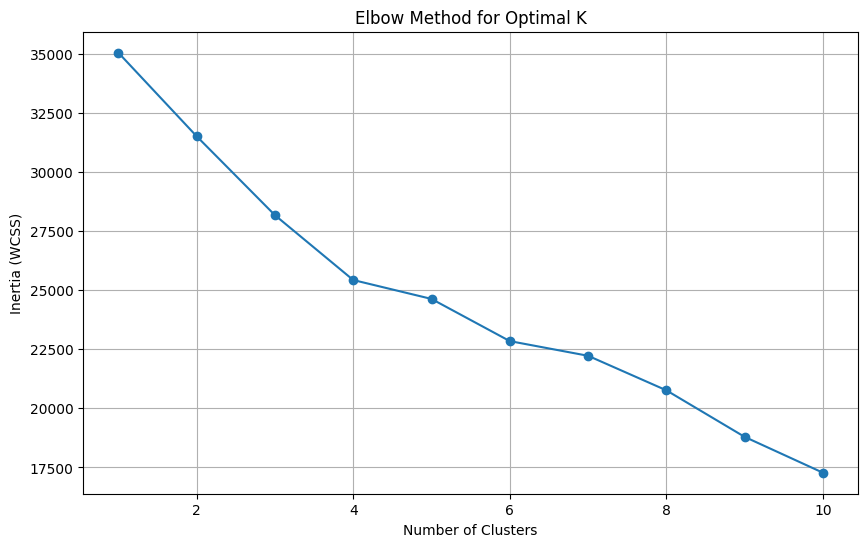

Shape of dataset for cluster 0: (351, 21)
Shape of dataset for cluster 1: (763, 21)
Shape of dataset for cluster 2: (304, 21)
Shape of dataset for cluster 3: (251, 21)

Cluster distribution in test data: [ 88 184  80  66]


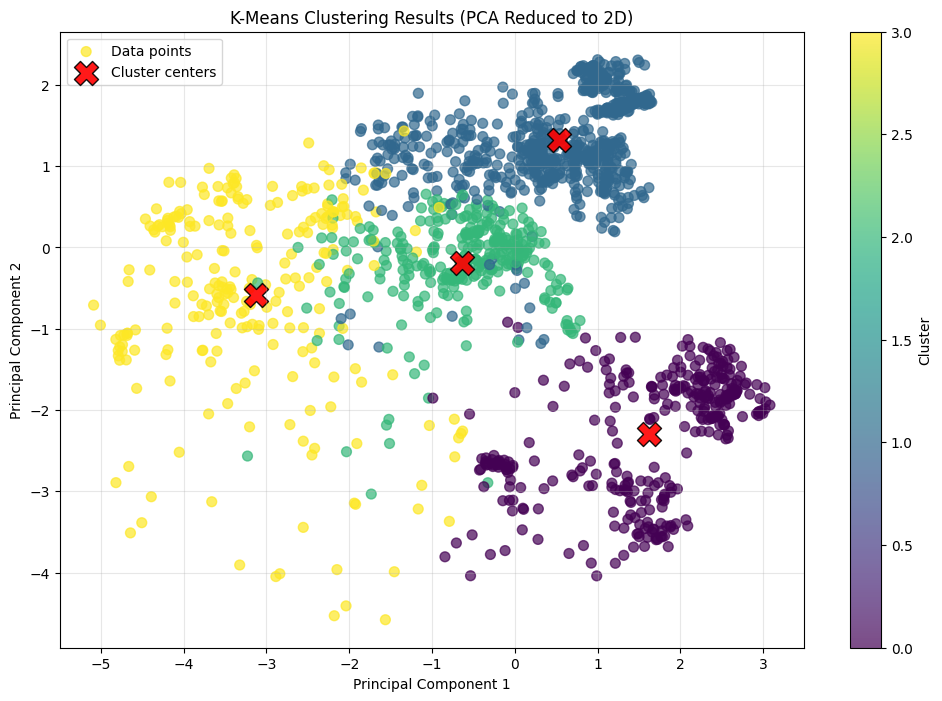

PCA Explained Variance Ratio: [0.14467697 0.12029148]
Total Variance Explained: 0.265


In [138]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Perform K-Means clustering on your scaled data
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=42,n_init=10)
kmeans.fit(X_train)

# Get predictions and cluster centers
labels = kmeans.predict(X_train)
centers = kmeans.cluster_centers_

# Apply elbow method to find optimal number of clusters
inertias = []
max_clusters = 10

for k in range(1, max_clusters + 1):
    kmeans_elbow = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    #n_init: how many different times to run with different initial centroids and keep the best result (the one with the lowest inertia).
    kmeans_elbow.fit(X_train)
    inertias.append(kmeans_elbow.inertia_)


# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Split data by cluster assignments
data_split = {}
n_clusters = 4

for cluster_id in range(n_clusters):
    data_split[cluster_id] = X_train[labels == cluster_id]
    print(f"Shape of dataset for cluster {cluster_id}: {data_split[cluster_id].shape}")

# Optional: Apply to test data
test_labels = kmeans.predict(X_test)
print(f"\nCluster distribution in test data: {np.bincount(test_labels)}")

# Create cluster visualization using PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_train)
centers_pca = pca.transform(centers)

# Plot the clusters in 2D space
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis', alpha=0.7)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=300, alpha=0.9, marker='X', edgecolors='black')
plt.title('K-Means Clustering Results (PCA Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.legend(['Data points', 'Cluster centers'], loc='best')
plt.grid(True, alpha=0.3)
plt.show()

# Print explained variance of PCA components
print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {sum(pca.explained_variance_ratio_):.3f}")

Random Forest Classifier Results:
Accuracy: 0.9713

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.95      0.97        59
      Normal_Weight       0.87      0.97      0.91        61
     Obesity_Type_I       1.00      0.99      0.99        70
    Obesity_Type_II       1.00      1.00      1.00        64
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.96      0.91      0.93        55
Overweight_Level_II       0.98      0.98      0.98        49

           accuracy                           0.97       418
          macro avg       0.97      0.97      0.97       418
       weighted avg       0.97      0.97      0.97       418



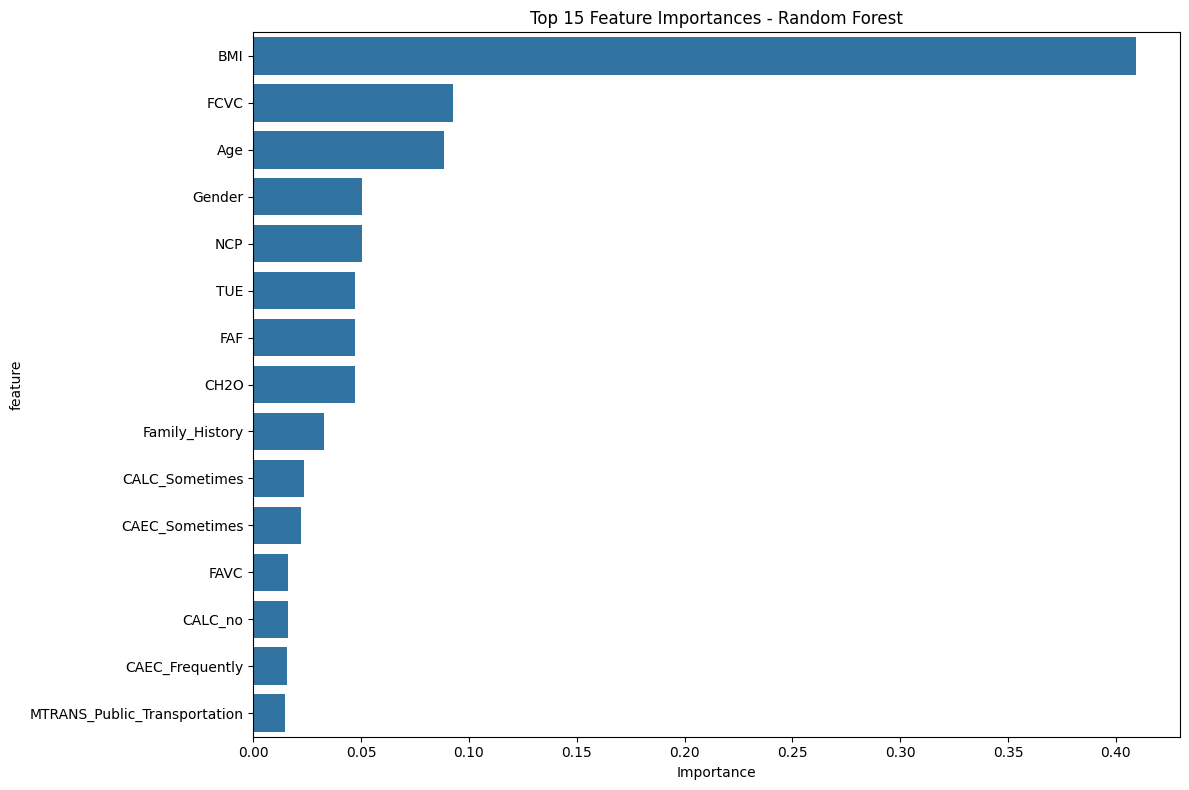


Top 10 Most Important Features:
       feature  importance
           BMI    0.409296
          FCVC    0.092761
           Age    0.088334
        Gender    0.050528
           NCP    0.050343
           TUE    0.047392
           FAF    0.047029
          CH2O    0.046966
Family_History    0.032624
CALC_Sometimes    0.023391


In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate performance
print("Random Forest Classifier Results:")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance - CORRECTED
# Get feature names from the original X_train before scaling
feature_names = encoded_df.drop(columns=['Obesity_Class']).columns

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

In [140]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42, probability=True)  # rbf kernel is commonly used
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate performance
print("SVM Classifier Results:")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Compare with Random Forest
print("\n" + "="*50)
print("MODEL COMPARISON:")
print("="*50)

print(f"Logistic Regression Accuracy: " ,logAcc)
print(f"KNN Accuracy: " , knnAcc)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")


SVM Classifier Results:
Accuracy: 0.8660

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.86      0.90        59
      Normal_Weight       0.66      0.69      0.67        61
     Obesity_Type_I       0.96      0.91      0.93        70
    Obesity_Type_II       0.98      0.98      0.98        64
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.72      0.80      0.76        55
Overweight_Level_II       0.79      0.78      0.78        49

           accuracy                           0.87       418
          macro avg       0.86      0.86      0.86       418
       weighted avg       0.87      0.87      0.87       418


MODEL COMPARISON:
Logistic Regression Accuracy:  0.868421052631579
KNN Accuracy:  0.8014354066985646
Random Forest Accuracy: 0.9713
SVM Accuracy: 0.8660


Target variable shape after one-hot encoding:
y_train_dummies: (1669, 7)
y_test_dummies: (418, 7)

Class distribution:
Insufficient_Weight    208
Normal_Weight          221
Obesity_Type_I         281
Obesity_Type_II        233
Obesity_Type_III       264
Overweight_Level_I     221
Overweight_Level_II    241
dtype: int64

MLP Classifier Results:
Accuracy: 0.9115

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.90      0.93        59
      Normal_Weight       0.83      0.85      0.84        61
     Obesity_Type_I       0.94      0.96      0.95        70
    Obesity_Type_II       0.97      1.00      0.98        64
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.82      0.75      0.78        55
Overweight_Level_II       0.83      0.90      0.86        49

           accuracy                           0.91       418
          macro avg       0.91      0.91      0.91       418
 

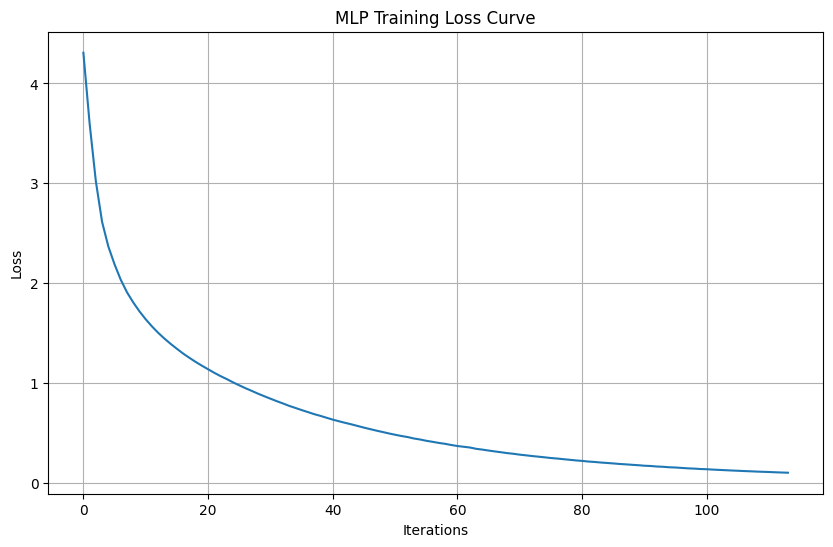


MODEL COMPARISON:
Logistic Regression Accuracy:  0.868421052631579
KNN Accuracy:  0.8014354066985646
Random Forest Accuracy: 0.9713
SVM Accuracy: 0.8660
MLP Accuracy: 0.9115


In [141]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Convert target to dummy variables (one-hot encoding)
y_train_dummies = pd.get_dummies(y_train)
y_test_dummies = pd.get_dummies(y_test)

print("Target variable shape after one-hot encoding:")
print(f"y_train_dummies: {y_train_dummies.shape}")
print(f"y_test_dummies: {y_test_dummies.shape}")
print("\nClass distribution:")
print(y_train_dummies.sum())

# Train MLP classifier with dummy encoded targets
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    activation='relu',
    solver='adam',
    random_state=42,
    max_iter=1000,
    early_stopping=True,
    validation_fraction=0.1
)
mlp_classifier.fit(X_train, y_train_dummies)

# Make predictions (returns probabilities for each class)
y_pred_proba_mlp = mlp_classifier.predict_proba(X_test)

# Convert probabilities to class predictions
y_pred_mlp = np.argmax(y_pred_proba_mlp, axis=1)

# Convert dummy encoded predictions back to original class labels
# Get the original class names from the dummy columns
class_names = y_train_dummies.columns
y_pred_mlp_labels = [class_names[i] for i in y_pred_mlp]

# Also convert true test labels from dummy format back to original labels
y_test_labels = [class_names[i] for i in np.argmax(y_test_dummies.values, axis=1)]

# Evaluate performance
print("\nMLP Classifier Results:")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_mlp_labels):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_mlp_labels))

# Plot training loss curve
plt.figure(figsize=(10, 6))
plt.plot(mlp_classifier.loss_curve_)
plt.title('MLP Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


# Create a custom scorer that handles dummy encoded format
def accuracy_dummy_scorer(estimator, X, y_dummies):
    y_pred_proba = estimator.predict_proba(X)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(y_dummies, axis=1)
    return accuracy_score(y_true, y_pred)


# Compare with other models (need to ensure consistent evaluation)
print("\n" + "="*50)
print("MODEL COMPARISON:")
print("="*50)
print(f"Logistic Regression Accuracy: " ,logAcc)
print(f"KNN Accuracy: " , knnAcc)
print(f"Random Forest Accuracy: {accuracy_score(y_test_labels, y_pred):.4f}")
print(f"SVM Accuracy: {accuracy_score(y_test_labels, y_pred_svm):.4f}")
print(f"MLP Accuracy: {accuracy_score(y_test_labels, y_pred_mlp_labels):.4f}")

In [142]:
##ADVANCED REPORTS VISUALIZATION!!!!!!!!!!!!
##!pip install ydata-profiling _ used to download the module of ydata as it wasnt preinsalled on colab
#from ydata_profiling import ProfileReport
#df= pd.read_csv('ObData.csv')
#profile = ProfileReport(df, title="Profiling Report")
#profile